# Feature Selection

## Importing Libraries and importing dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

#data = pd.read_csv('dataset/roi_95img_9_roi_glrlm_32p.csv')
train = pd.read_csv('dataset/train.csv')

X_train = train.copy()
y_train = X_train.pop('target')

std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train), columns=X_train.columns)

In [2]:
cols = train.columns
fishertrain = train.drop(cols[0],axis = 1)

# Fisher's Score

In [3]:
X = X_train.to_numpy()
Y = y_train.to_numpy()


ranks = fisher_score.fisher_score(X,Y)

#remove first 30 features
dropped_columns = ranks[30:]
cols = train.columns
fishertrain = train.copy()
for i in range(len(dropped_columns)):
    fishertrain = fishertrain.drop(cols[dropped_columns[i]],axis = 1)

fishertrain.to_csv('dataset/fishertrain.csv',index= False)

test = pd.read_csv('dataset/test.csv')
cols = test.columns
fishertest = test.copy()
for i in range(len(dropped_columns)):
    fishertest = fishertest.drop(cols[dropped_columns[i]],axis = 1)

fishertest.to_csv('dataset/fishertest.csv',index= False)    

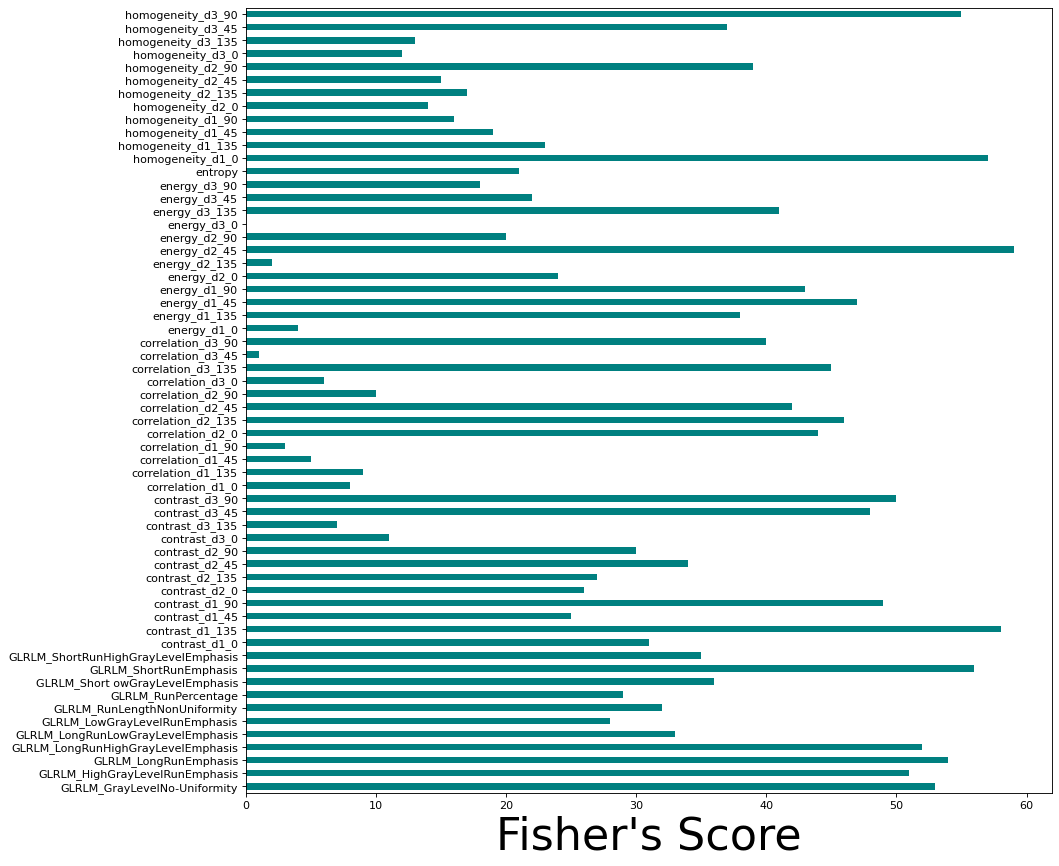

In [4]:
feat_importance = pd.Series(ranks,X_train.columns[0:len(X_train.columns)])
plt.figure(figsize=(13, 13), dpi=80)
plt.xlabel('Fisher\'s Score', fontsize=40)
feat_importance.plot(kind='barh',color='teal')
plt.show()

# Correlation Matrix

In [5]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr, corr_matrix

In [6]:
correlation_train = train.copy()
correlation_test = test.copy()
corr_features, corr_matrix = correlation(correlation_train, 0.7)


<AxesSubplot:>

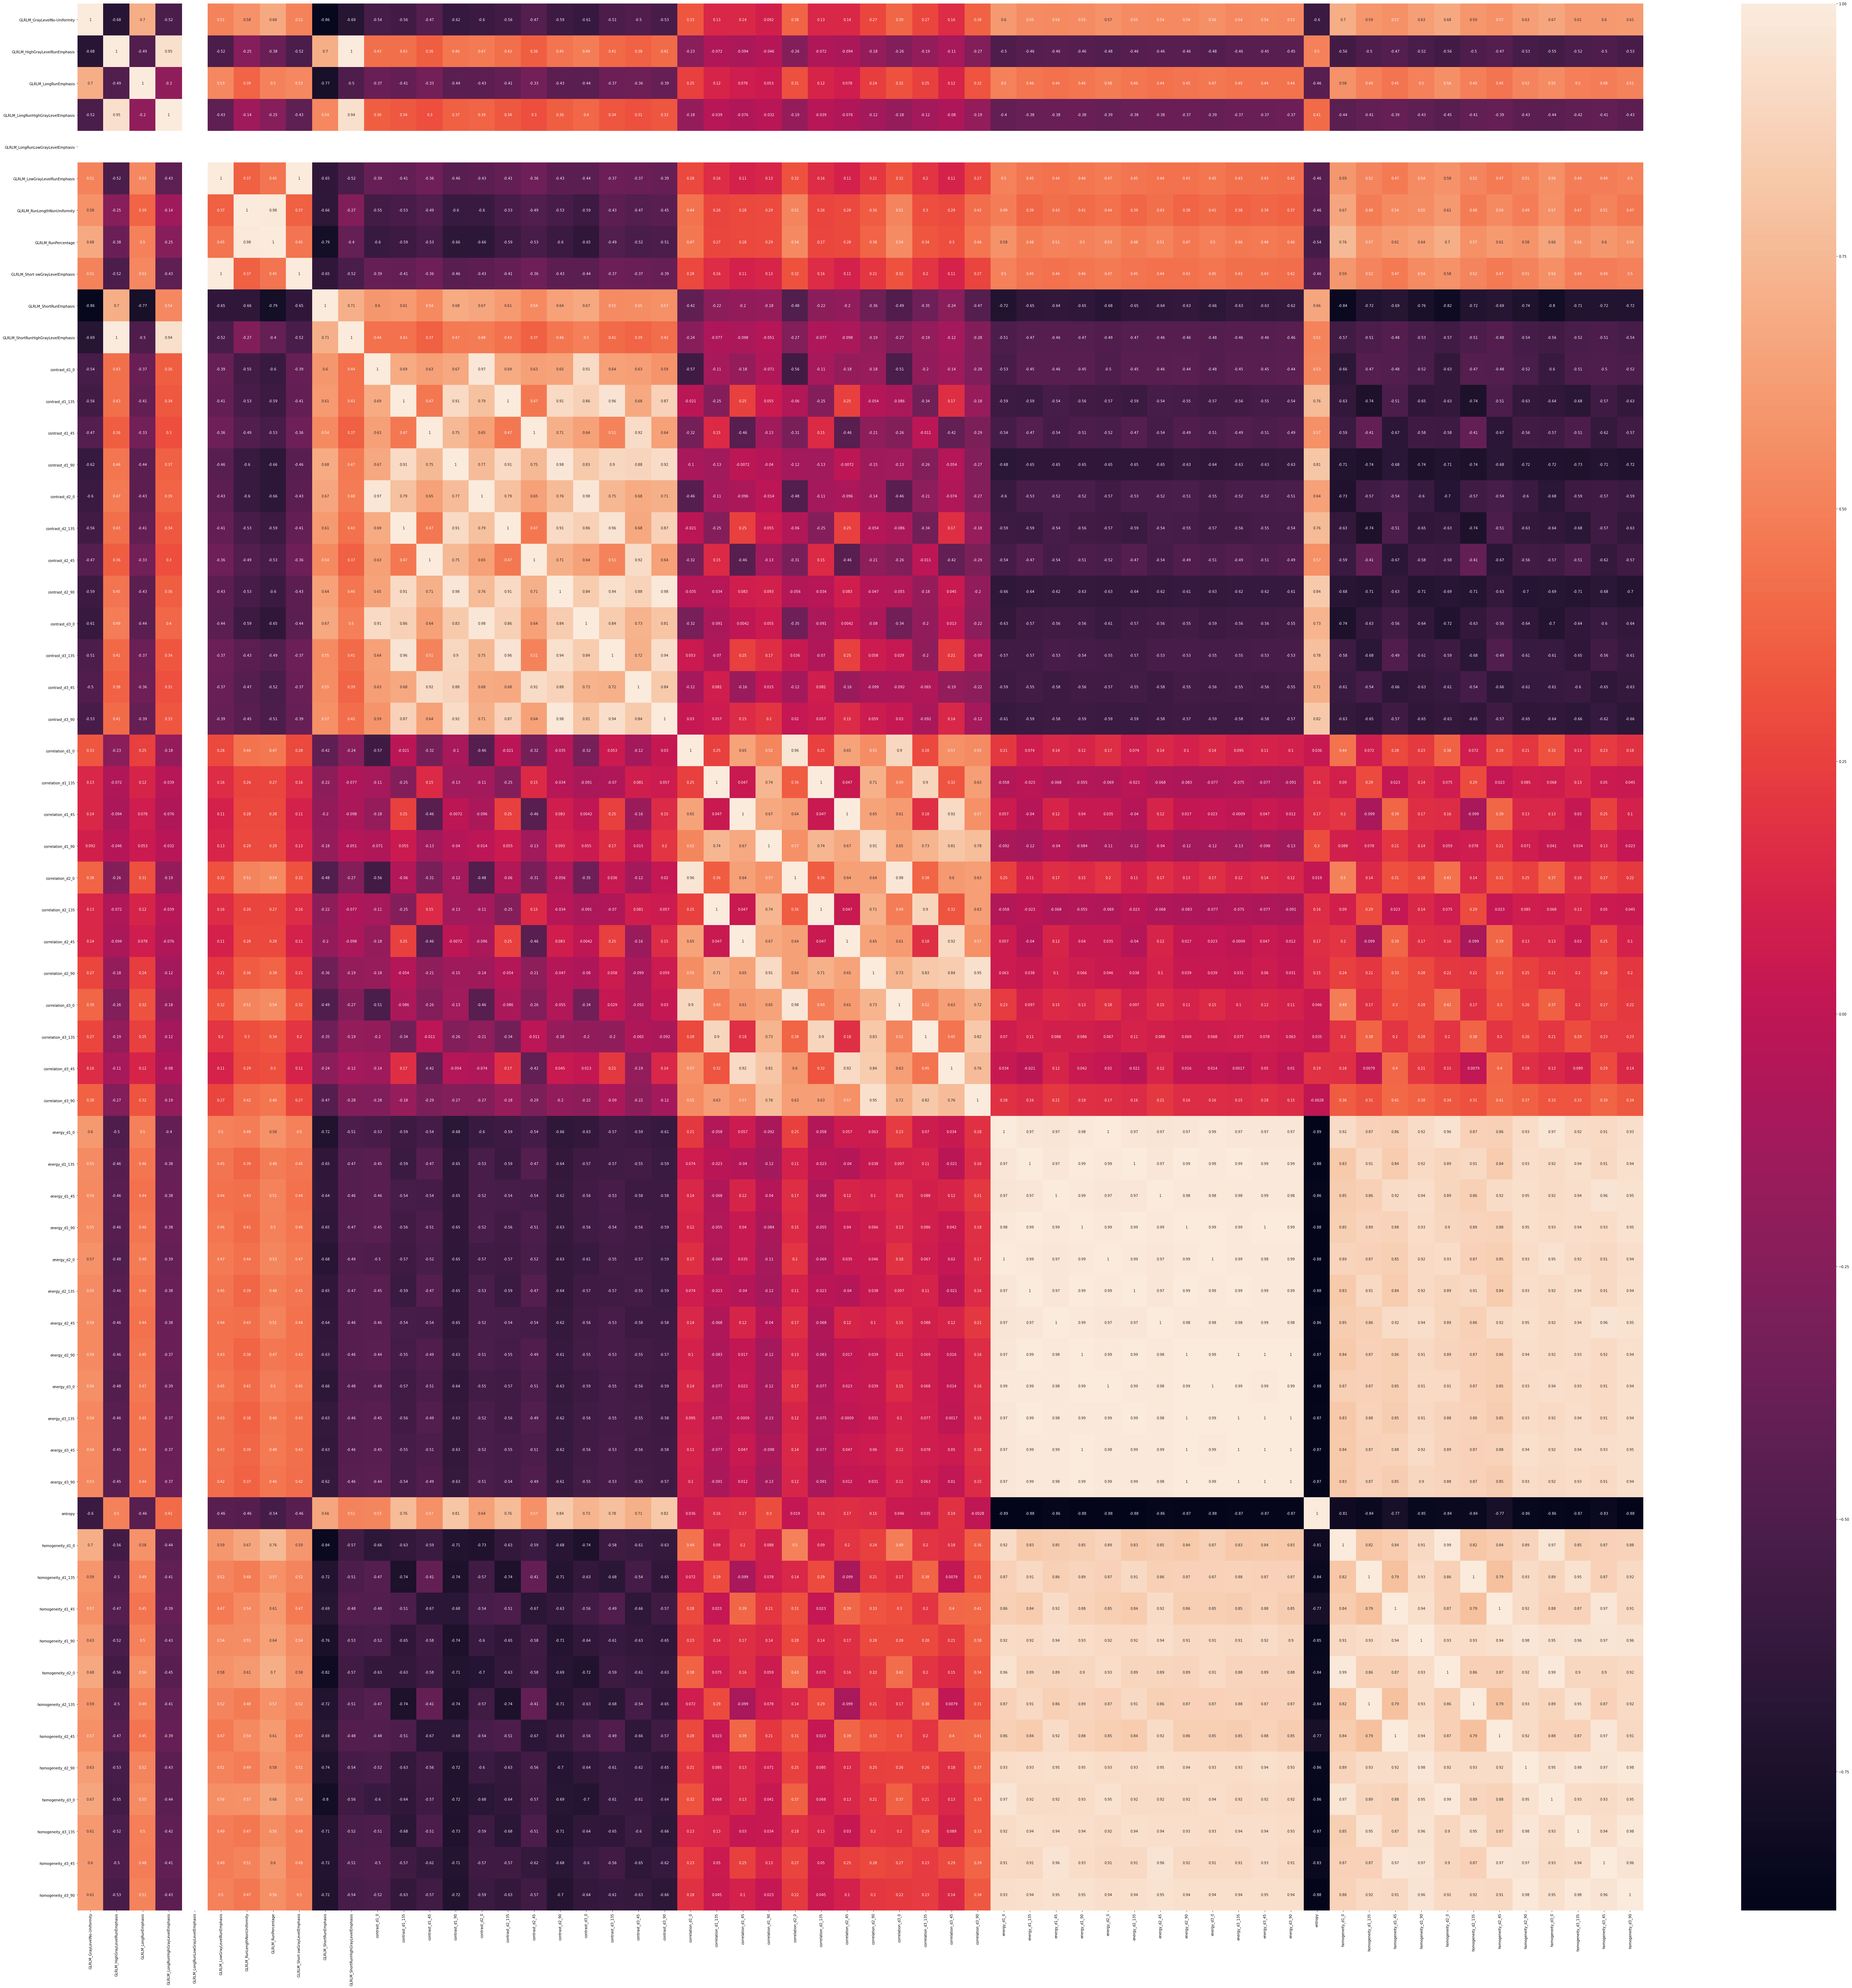

In [7]:
plt.figure(figsize=(100,100))
sns.heatmap(corr_matrix, annot=True)

In [8]:
correlation_train = correlation_train.drop(corr_features,axis=1)
correlation_test = correlation_test.drop(corr_features,axis=1)
correlation_test.to_csv('dataset/corrtest.csv' ,index= False)    
correlation_train.to_csv('dataset/corrtrain.csv',index= False)    

# Mutual Information Score

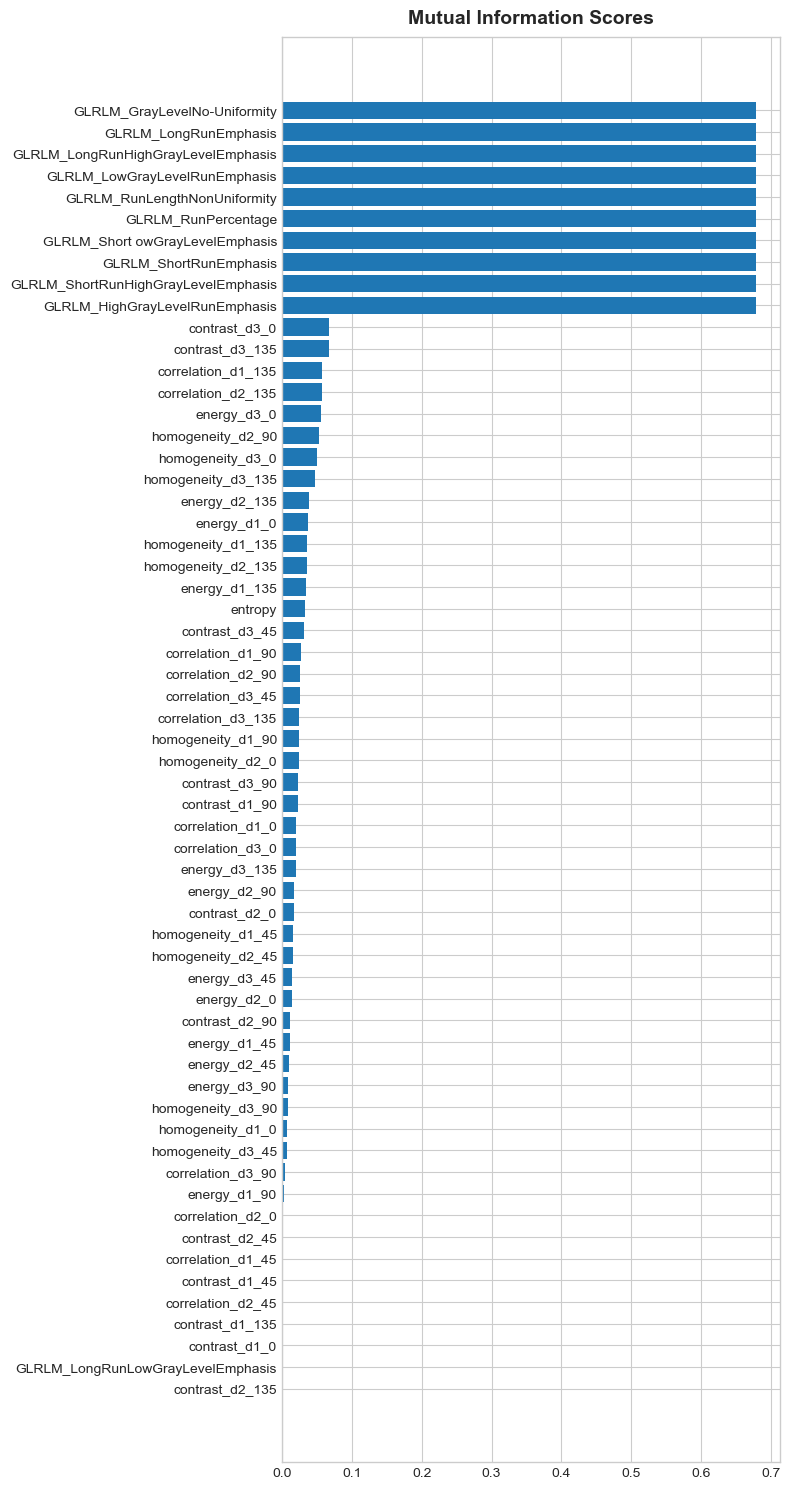

In [9]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
mi_scores = make_mi_scores(X_train, y_train)

plt.figure(dpi=100, figsize=(8, 15))
plot_mi_scores(mi_scores)

In [10]:
threshold = 0.6
cols_to_remove = []
for key in mi_scores.keys():
    if mi_scores[key] < 0.6:
        cols_to_remove.append(key)
        
mi_train = train.drop(columns=cols_to_remove)
mi_test = test.drop(columns=cols_to_remove)
mi_test.to_csv('dataset/mi_test.csv' ,index= False)    
mi_train.to_csv('dataset/mi_train.csv',index= False)    